In [93]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
import pandas
from sklearn.model_selection import train_test_split


In [94]:

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Convert the pixel values to binary values
threshold = 128
binary_mnist = np.where(mnist.data >= threshold, 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(binary_mnist, mnist.target, test_size=0.2, random_state=42)

# Select only the training examples where y is 0 or 1
mask = (y_train == '0') | (y_train == '1')
X_train = X_train[mask]
y_train = y_train[mask]

# Save the arrays to disk
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)


In [95]:
import numpy as np

# Load the saved arrays from disk
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy', allow_pickle=True)
y_test = np.load('y_test.npy', allow_pickle=True)


In [96]:
print ('The shape of X is: ' + str(X_train.shape))
print ('The shape of y is: ' + str(y_train.shape))

The shape of X is: (11837, 784)
The shape of y is: (11837,)


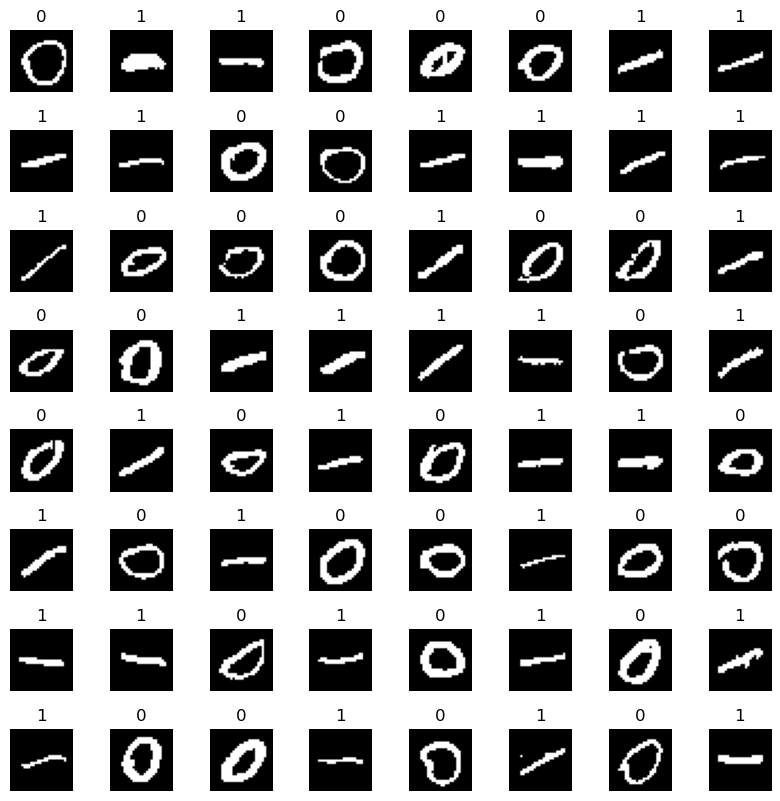

In [97]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_train[random_index])
    ax.set_axis_off()

In [98]:
# UNQ_C1
# GRADED CELL: Sequential model
from tensorflow.keras import layers

model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),    #specify input size
        ### START CODE HERE ### 
        layers.Dense(25, activation="sigmoid", name="layer1"),
        layers.Dense(15, activation="sigmoid", name="layer2"),
        layers.Dense(1, activation="sigmoid", name="layer3"),

        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)                            


In [99]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 25)                19625     
                                                                 
 layer2 (Dense)              (None, 15)                390       
                                                                 
 layer3 (Dense)              (None, 1)                 16        
                                                                 
Total params: 20,031
Trainable params: 20,031
Non-trainable params: 0
_________________________________________________________________


In [100]:
[layer1, layer2, layer3] = model.layers

In [101]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 1), b3 shape = (1,)


In [102]:
print(model.layers[2].weights)

[<tf.Variable 'layer3/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[ 0.25084132],
       [-0.05077726],
       [ 0.28142637],
       [-0.00192267],
       [ 0.44552082],
       [-0.07048619],
       [-0.51009846],
       [ 0.56237954],
       [-0.5914695 ],
       [-0.338199  ],
       [-0.45972872],
       [ 0.3851713 ],
       [ 0.28802067],
       [-0.4272492 ],
       [ 0.27985698]], dtype=float32)>, <tf.Variable 'layer3/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [103]:
y_train = y_train.astype(int)

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=20
)

Epoch 1/20
370/370 [==============================] - 2s 5ms/step - loss: 0.1532
Epoch 2/20
370/370 [==============================] - 2s 5ms/step - loss: 0.0216
Epoch 3/20
370/370 [==============================] - 2s 5ms/step - loss: 0.0109
Epoch 4/20
370/370 [==============================] - 2s 5ms/step - loss: 0.0067
Epoch 5/20
370/370 [==============================] - 2s 5ms/step - loss: 0.0048
Epoch 6/20
370/370 [==============================] - 2s 5ms/step - loss: 0.0031
Epoch 7/20
370/370 [==============================] - 2s 5ms/step - loss: 0.0023
Epoch 8/20
370/370 [==============================] - 2s 5ms/step - loss: 0.0018
Epoch 9/20
370/370 [==============================] - 2s 5ms/step - loss: 0.0015
Epoch 10/20
370/370 [==============================] - 2s 5ms/step - loss: 0.0012
Epoch 11/20
370/370 [==============================] - 2s 5ms/step - loss: 8.4257e-04
Epoch 12/20
370/370 [==============================] - 2s 5ms/step - loss: 5.4662e-04
Epoch 13/20
370/3

In [104]:
prediction = model.predict(X_train[0].reshape(1,784))  # a zero
print(f" predicting a zero: {prediction}")
prediction = model.predict(X_train[500].reshape(1,784))  # a one
print(f" predicting a one:  {prediction}")

1/1 [==============================] - 0s 31ms/step
 predicting a zero: [[9.197555e-05]]
1/1 [==============================] - 0s 9ms/step
 predicting a one:  [[0.9999336]]


In [105]:
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print(f"prediction after threshold: {yhat}")

prediction after threshold: 1


In [106]:
def sigmoid(x):
    """
    Compute the sigmoid function for the input x.

    Arguments:
    x -- A scalar or numpy array.

    Return:
    s -- sigmoid(x)
    """
    s = 1 / (1 + np.exp(-x))
    return s

In [107]:
# UNQ_C2
# GRADED FUNCTION: my_dense

def my_dense(a_in, W, b, g):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    units = W.shape[1]
    a_out = np.zeros(units)
### START CODE HERE ### 
    for j in range(units):
        z = np.dot(W[:,j],a_in) + b[j]
        a_out[j] = g(z)
        
### END CODE HERE ### 
    return(a_out)


In [108]:
# Quick Check
x_tst = 0.1*np.arange(1,3,1).reshape(2,)  # (1 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(3,)  # (3 features)
A_tst = my_dense(x_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[0.54735762 0.57932425 0.61063923]


In [109]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x,  W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)
    return(a3)

In [110]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [111]:
# make predictions
prediction = my_sequential(X_train[0], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y_train[0])
prediction = my_sequential(X_train[500], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
if prediction >= 0.5:
    yhat = 1
else:
    yhat = 0
print( "yhat = ", yhat, " label= ", y_train[500])

yhat =  0  label=  0
yhat =  1  label=  1


1/1 [==============================] - 0s 9ms/step


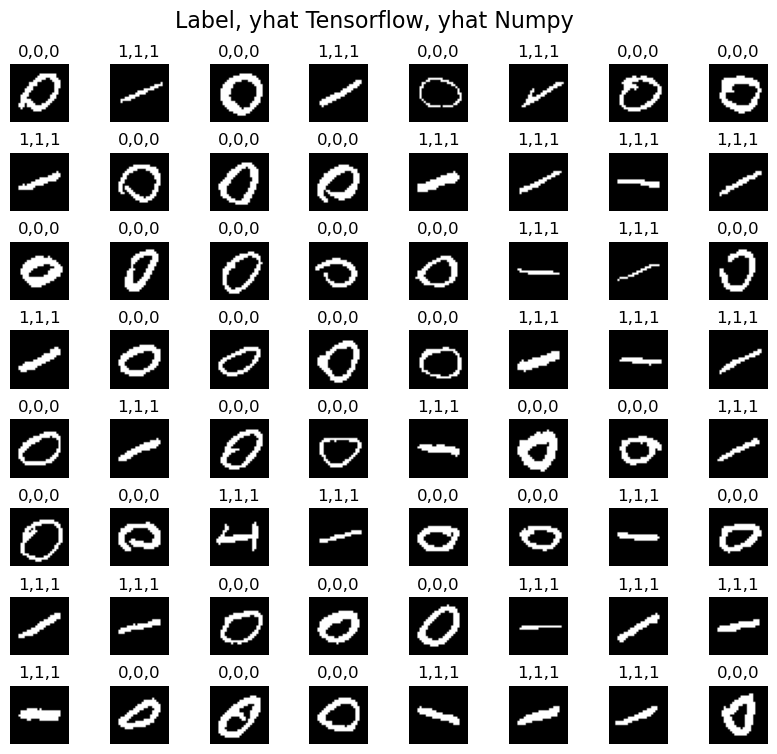

In [113]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8,8, figsize=(8,8))
fig.tight_layout(pad=0.1,rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28,28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')

    # Predict using the Neural Network implemented in Numpy
    my_prediction = my_sequential(X_train[random_index], W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
    my_yhat = int(my_prediction >= 0.5)

    # Predict using the Neural Network implemented in Tensorflow
    tf_prediction = model.predict(X_train[random_index].reshape(1,784))
    tf_yhat = int(tf_prediction >= 0.5)
    
    # Display the label above the image
    ax.set_title(f"{y_train[random_index]},{tf_yhat},{my_yhat}")
    ax.set_axis_off() 
fig.suptitle("Label, yhat Tensorflow, yhat Numpy", fontsize=16)
plt.show()

In [114]:
# UNQ_C3
# UNGRADED FUNCTION: my_dense_v

def my_dense_v(A_in, W, b, g):
    """
    Computes dense layer
    Args:
      A_in (ndarray (m,n)) : Data, m examples, n features each
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (1,j)) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      A_out (tf.Tensor or ndarray (m,j)) : m examples, j units
    """
### START CODE HERE ### 
    # mulitply matrixes A_in and W and add that product with the 1d array b.
    z = np.matmul(A_in, W) + b
    A_out = g(z)
### END CODE HERE ### 
    return(A_out)

In [115]:
X_tst = 0.1*np.arange(1,9,1).reshape(4,2) # (4 examples, 2 features)
W_tst = 0.1*np.arange(1,7,1).reshape(2,3) # (2 input features, 3 output features)
b_tst = 0.1*np.arange(1,4,1).reshape(1,3) # (1,3 features)
A_tst = my_dense_v(X_tst, W_tst, b_tst, sigmoid)
print(A_tst)

[[0.54735762 0.57932425 0.61063923]
 [0.57199613 0.61301418 0.65248946]
 [0.5962827  0.64565631 0.6921095 ]
 [0.62010643 0.67699586 0.72908792]]


In [116]:
def my_sequential_v(X, W1, b1, W2, b2, W3, b3):
    A1 = my_dense_v(X,  W1, b1, sigmoid)
    A2 = my_dense_v(A1, W2, b2, sigmoid)
    A3 = my_dense_v(A2, W3, b3, sigmoid)
    return(A3)

In [117]:
W1_tmp,b1_tmp = layer1.get_weights()
W2_tmp,b2_tmp = layer2.get_weights()
W3_tmp,b3_tmp = layer3.get_weights()

In [118]:
Prediction = my_sequential_v(X_train, W1_tmp, b1_tmp, W2_tmp, b2_tmp, W3_tmp, b3_tmp )
Prediction.shape

(11837, 1)

In [119]:
Yhat = (Prediction >= 0.5).astype(int)
print("predict a zero: ",Yhat[0], "predict a one: ", Yhat[500])

predict a zero:  [0] predict a one:  [1]


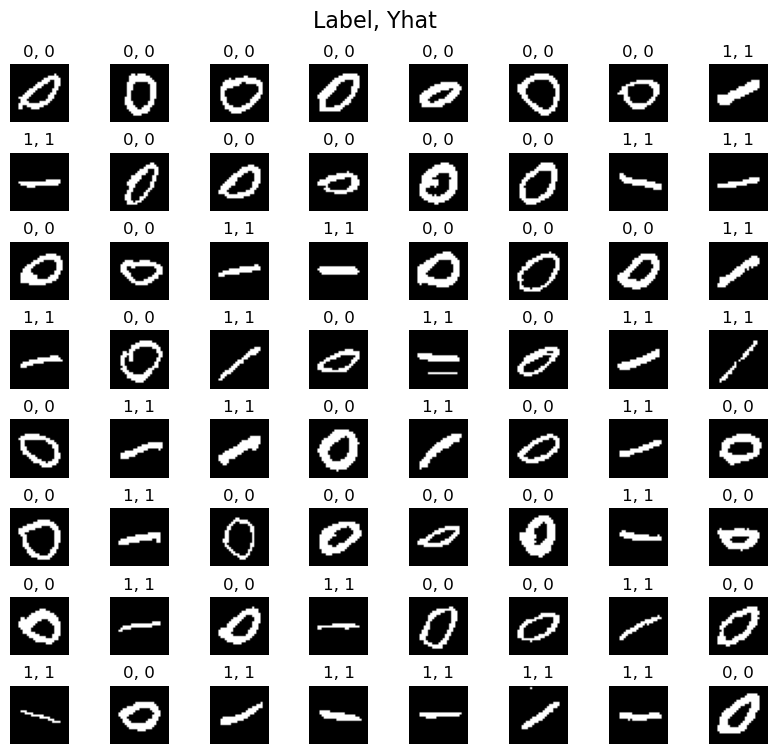

In [120]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_train.shape

fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.tight_layout(pad=0.1, rect=[0, 0.03, 1, 0.92]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_train[random_index].reshape((28, 28)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
   
    # Display the label above the image
    ax.set_title(f"{y_train[random_index]}, {Yhat[random_index, 0]}")
    ax.set_axis_off() 
fig.suptitle("Label, Yhat", fontsize=16)
plt.show()

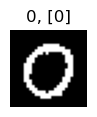

In [122]:
fig = plt.figure(figsize=(1, 1))
errors = np.where(y_train != Yhat)
random_index = errors[0][0]
X_random_reshaped = X_train[random_index].reshape((28, 28)).T
plt.imshow(X_random_reshaped, cmap='gray')
plt.title(f"{y_train[random_index]}, {Yhat[random_index]}")
plt.axis('off')
plt.show()